<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# ES8 MAI - Filtros digitales
#### Alumno: Matias Pardo Errecarret

## Consigna Cuadripolos:
<img src="./consigna.png" align="center"  />

## Analisis de Cuadripolos - Transferencia de tension
## 1.

In [2]:
from IPython.display import IFrame
IFrame("./Analisis_cuadripolos.pdf", width=900, height=1000)

In [22]:
import sympy as sp
from sympy.abc import s #importamos simbolo s
from IPython.display import display, Math

#Declaro simbolos variables
Vi, Vo = sp.symbols("Vi, Vo")
Za, Zb, Zc, Yl, L1, L2, Rl, C = sp.symbols("Za, Zb, Zc, Yl, L1, L2, Rl, C")

#Red 1 Parametros Z
Z11 = Za + Zb
Z12 = Zb
Z21 = Zb
Z22 = Zc + Zb

#Red 1 Parametros T
A_1 = Z11/Z21
B_1 = ((Z11*Z22)-(Z21*Z12))/Z21
C_1 = 1/Z21
D_1 = Z22/Z21

#Chequeos intermedios
#cancel() will take any rational function and put it into the standard canonical form
#B_1 = sp.cancel(B_1)
#display(B_1)

#Red 2
A_2 = 1
B_2 = 0
C_2 = 1/Rl
D_2 = 1

A_tot = A_1 * A_2 + B_1 * C_2

Av_tot = 1/A_tot

#Chequeos intermedios
#Av_tot = sp.cancel(Av_tot)
#display(Av_tot)

#Reemplazo por los componentes
Av_tot = Av_tot.subs([(Za, s*L1), (Zb, 1/(s*C)),(Zc, s*L2)])

num, den = sp.fraction(Av_tot)

num = sp.Poly(num,s)
den = sp.Poly(den,s)

k = num.LC() / den.LC()

num = num.monic()
den = den.monic()

Av_tot = sp.Mul(k,num/den, evaluate=True)

display(Av_tot)

Rl/(C*L1*L2*(s**3 + Rl*s**2/L2 + Rl/(C*L1*L2) + s*(L1 + L2)/(C*L1*L2)))

### Simulacion Numerica

<IPython.core.display.Math object>

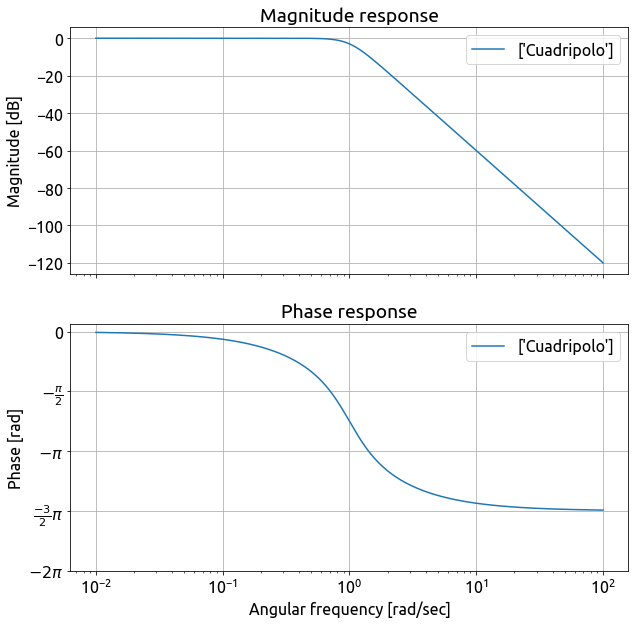

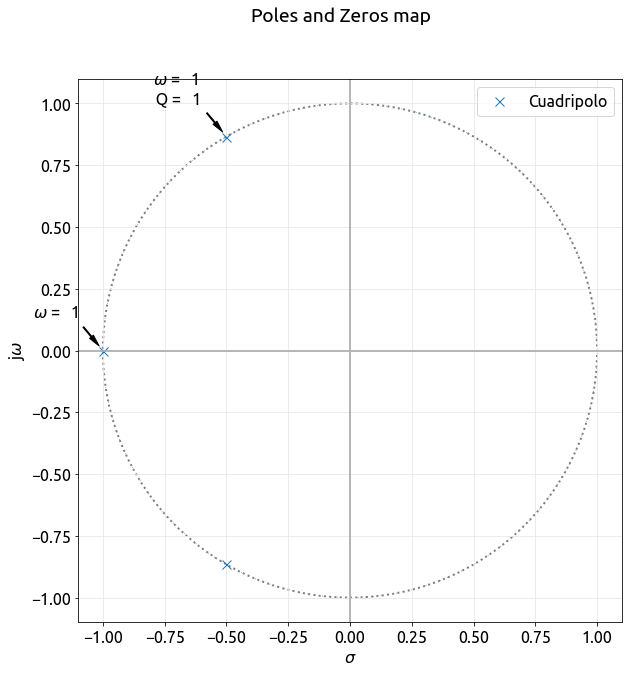

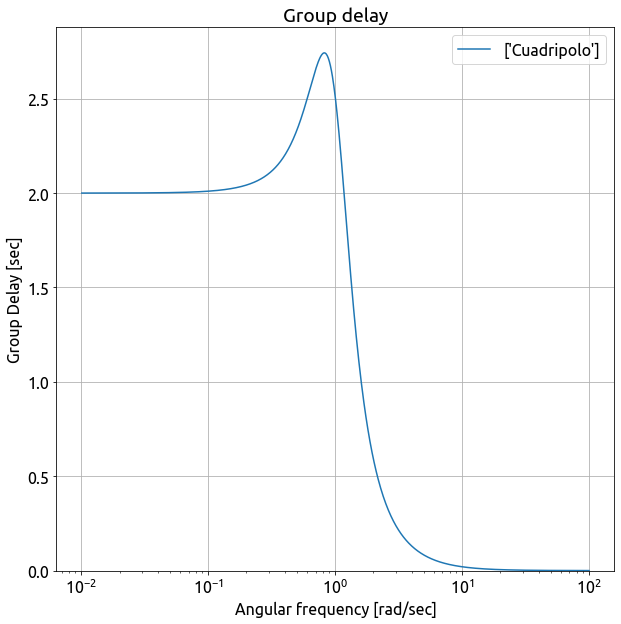

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_lti, pretty_print_SOS

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

all_sos = []
L1 = 1.5
C = 4/3
L2 = 0.5
R = 1

num = [R/(L1*L2*C)]
den = [1,R/L2,(L1+L2)/(L1*L2*C),R/(L1*L2*C)]

mi_sos = sig.TransferFunction(num,den)

pretty_print_lti(mi_sos)

analyze_sys([mi_sos],['Cuadripolo'])


## Analisis de Cuadripolos - Simulacion Circuital
## 2.

<img src="./1_tf_spice.png" align="center"  />

## Analisis matricial - MAI

In [3]:
IFrame("./Analisis_MAI.pdf", width=900, height=1000)

## Consigna Filtros Digitales - TP5 Eje2:
<img src="./consigna_2.png" align="left"  />

In [4]:
IFrame("./Analisis_FiltroDigitalLP.pdf", width=900, height=1000)

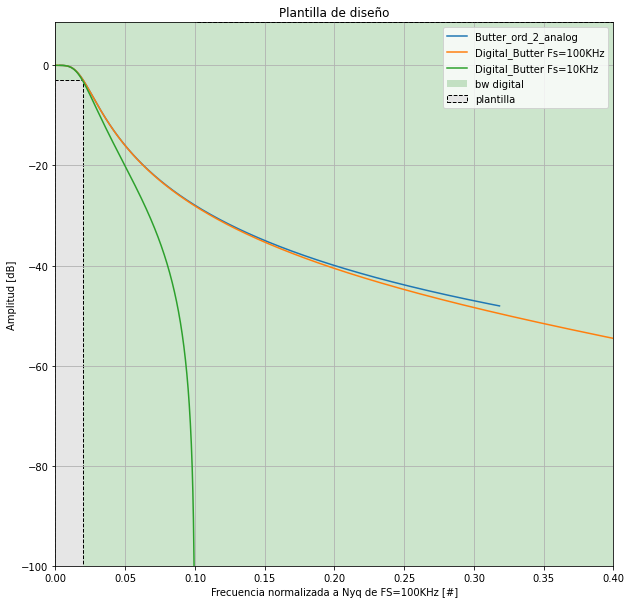

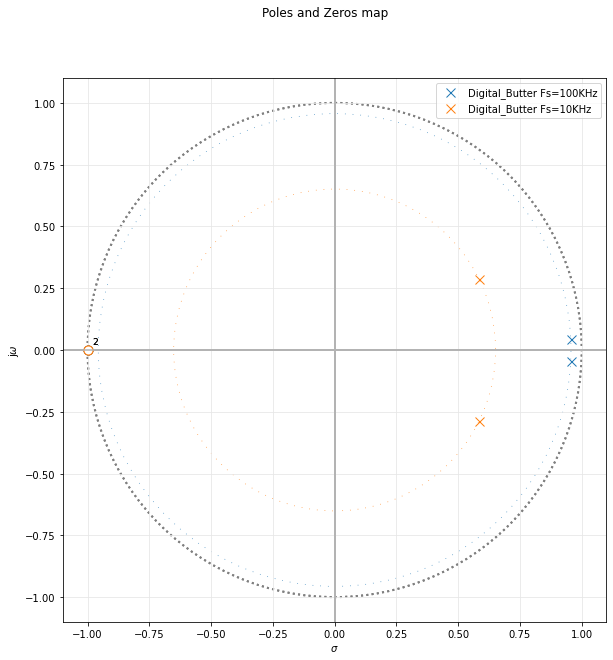

In [55]:
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
from splane import analyze_sys, plot_plantilla, pzmap

# Setup inline graphics
mpl.rcParams['figure.figsize'] = (10,10)
filter_names = []
analog_filters_names = []
digital_filters_names = []

f0 = 1e3 # normalizado respecto a nyq (fs/2)
w0 =  2*np.pi*f0  # 
fs = 100e3
fs_2 = 10e3

fpass = f0/(fs/2) # 
fstop = 5e3/(fs/2) # 
filter_type = 'lowpass'
ripple = 3
attenuation = -10

z,p,k = sig.buttap(2)
z, p, k = sig.lp2lp_zpk(z, p, k, wo = w0)

num, den = sig.zpk2tf(z,p,k)
my_analog_filter = sig.TransferFunction(num,den)
my_analog_filter_desc = 'Butter' + '_ord_' + str(2) + '_analog'

filter_names.append(my_analog_filter_desc)

numz, denz = sig.bilinear(num, den, fs)
my_digital_filter = sig.TransferFunction(numz, denz, dt=1/fs)
my_digital_filter_desc = 'Digital_Butter Fs=100KHz'
filter_names.append(my_digital_filter_desc)

numz, denz = sig.bilinear(num, den, fs_2)
my_digital_filter_2 = sig.TransferFunction(numz, denz, dt=1/fs_2)
my_digital_filter_desc_2 = 'Digital_Butter Fs=10KHz'
filter_names.append(my_digital_filter_desc_2)

plt.figure(1)
plt.cla()

npoints = 1000
w_nyq = 2*np.pi*fs/2

w, mag, _ = my_analog_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_analog_filter_desc)

w, mag, _ = my_digital_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_digital_filter_desc)

w, mag, _ = my_digital_filter_2.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_digital_filter_desc_2)


plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a Nyq de FS=100KHz [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plt.gca().set_xlim([0, 0.4])
plot_plantilla(filter_type = filter_type , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

digital_fig_id, _ = pzmap(my_digital_filter, filter_description=my_digital_filter_desc, fig_id = 2)
digital_fig_id, _ = pzmap(my_digital_filter_2, filter_description=my_digital_filter_desc_2, fig_id = 2)

### PasaAltos Digital

/usr/local/lib/python3.8/dist-packages/scipy/signal/_ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))
/usr/local/lib/python3.8/dist-packages/scipy/signal/_ltisys.py:3860: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))


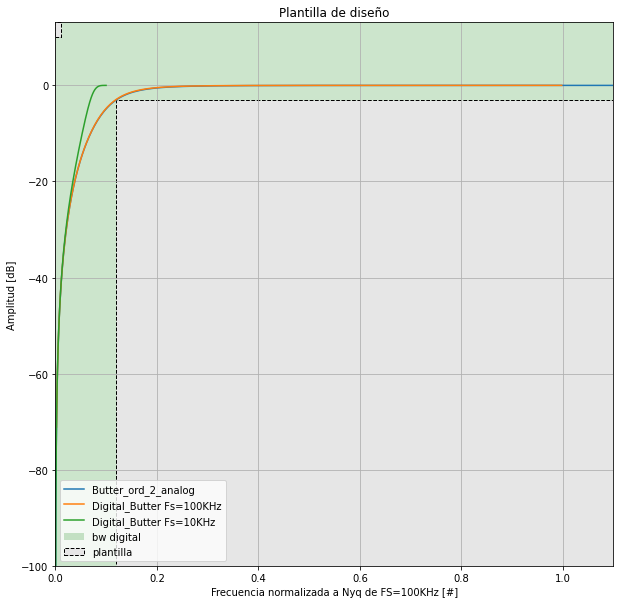

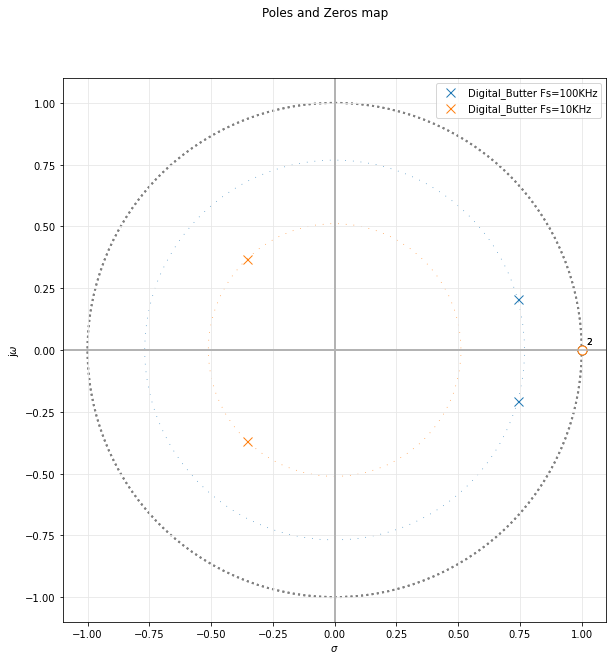

In [63]:
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
from splane import analyze_sys, plot_plantilla, pretty_print_SOS

# Setup inline graphics
mpl.rcParams['figure.figsize'] = (10,10)
filter_names = []
analog_filters_names = []
digital_filters_names = []

f0 = 6e3 # normalizado respecto a nyq (fs/2)
w0 =  2*np.pi*f0  # 
fs = 100e3
fs_2 = 10e3

fpass = f0/(fs/2) # 
fstop = 500/(fs/2) # 
filter_type = 'highpass'
ripple = 3
order = 2
attenuation = -10

num_hp, den_hp = sig.butter(order, w0, btype='highpass',analog=True,output='ba')

my_analog_filter = sig.TransferFunction(num_hp,den_hp)
my_analog_filter_desc = 'Butter' + '_ord_' + str(2) + '_analog'
filter_names.append(my_analog_filter_desc)

numz, denz = sig.bilinear(num_hp, den_hp, fs)
my_digital_filter = sig.TransferFunction(numz, denz, dt=1/fs)
my_digital_filter_desc = 'Digital_Butter Fs=100KHz'
filter_names.append(my_digital_filter_desc)

numz, denz = sig.bilinear(num_hp, den_hp, fs_2)
my_digital_filter_2 = sig.TransferFunction(numz, denz, dt=1/fs_2)
my_digital_filter_desc_2 = 'Digital_Butter Fs=10KHz'
filter_names.append(my_digital_filter_desc_2)

plt.figure(1)
plt.cla()

npoints = 500
w_nyq = 2*np.pi*fs/2

w, mag, _ = my_analog_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_analog_filter_desc)

w, mag, _ = my_digital_filter.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_digital_filter_desc)

w, mag, _ = my_digital_filter_2.bode(npoints)
plt.plot(w/w_nyq, mag, label=my_digital_filter_desc_2)


plt.title('Plantilla de diseño')
plt.xlabel('Frecuencia normalizada a Nyq de FS=100KHz [#]')
plt.ylabel('Amplitud [dB]')
plt.grid(which='both', axis='both')

plt.gca().set_xlim([0, 1.1])
#plt.gca().set_ylim([-10, 0])

plot_plantilla(filter_type = filter_type , fpass = fpass, ripple = ripple , fstop = fstop, attenuation = attenuation, fs = fs)

digital_fig_id, _ = pzmap(my_digital_filter, filter_description=my_digital_filter_desc, fig_id = 2)
digital_fig_id, _ = pzmap(my_digital_filter_2, filter_description=my_digital_filter_desc_2, fig_id = 2)

### Conclusiones Filtros digitales ejericio 2:
PasaBajos: Se comprueba que a mayor freceuncia de muestreo los polos estan mas cerca del eje Real. Tambien se confirma que los ceros tienen que estar en el $-1$. 
En el grafico de la transferencia se ve claramente el ancho de banda digital $(f_{Nyquist})$ de la señal muestreada en $10KHz$, esta misma caracteristica le da cierto peso en la transferencia y hace que en la banda de stop tenga mayor atenuacion que los otros dos. Por el otro lado, la filtro digital muestreado a $100KHz$ sigue casi identicamente al digital.

PasaAltos: En este caso vemos como el fitlro con $f_{s}=10KHz$ se queda muy corto ya que la frecuencia de corte esta en $6KHz > f_{nyq_{dig_2}}=5KHz$. En el diagrama ya vemos los polos del lado negativo lo cual nos da una mala señal. 
Por lo tanto, el unico filtro que se implementa correctamente es el muestrado a mayor $f_{s}$.

## Consigna Filtros Digitales - TP5 Eje3:
<img src="./consigna_3.png" align="left"  />

In [6]:
IFrame("./Analisis_TP5_Eje3.pdf", width=900, height=1000)